- add the code below as alternative labeling function
- try other methods that make sense (spectral, min-cut)
- benchmark under which circumstances which tends to work best and how consistent across runs

In [22]:
import numpy as np
import gseapy

from geneclusters.cluster_genes_new import get_gene_pathway_matrix, run_KL, compute_cost_metrics, add_outer
from geneclusters.previous import prev_kernighan_lin, prev_evaluate_cut, prev_create_random_labeling, prev_get_cross_costs, prev_get_pairwise_improvements, prev_discard_done_swaps

In [13]:
x = gseapy.get_library('WikiPathway_2021_Human')


In [14]:
np.save('./examples/WikiPathway_2021_Human.npy', x)

In [ ]:
# compare the outputs of each function to find the differences between mine and G's
# then compare which options create the smallest lost (include spectral and others?)

In [23]:
path = './examples/WikiPathway_2021_Human.npy'
mat = get_gene_pathway_matrix(path)
matrix = np.ascontiguousarray(mat.values.T)

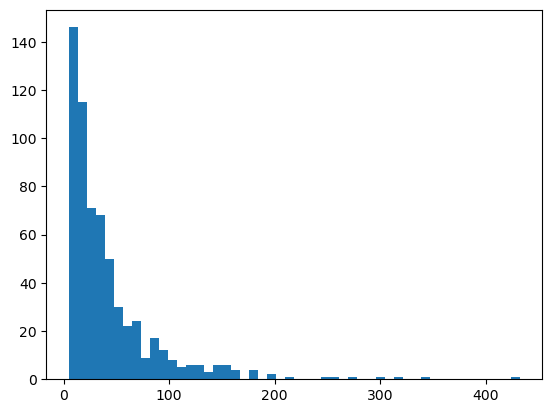

In [39]:
import matplotlib.pyplot as plt
plt.hist(np.sum(matrix, axis = 0), 50)
plt.show()

In [475]:
index_genes = (np.sum(matrix, axis = 1)>40)

In [476]:
len(index_genes)

7173

In [477]:
matrix.shape

(7173, 622)

In [ ]:
# label other genes and pathways probabilistically based on their connection to the index_genes
# count how far a given node is from an index gene and convert that into a set of probabilities to assign
# to each cluster
# why probabalistic and not deterministic?
### count how many edges separate a given node from an index_gene (shortest path)

In [470]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path
graph = csr_matrix(matrix)


In [471]:
m1 = np.concatenate((np.zeros(shape=(matrix.shape[0],matrix.shape[0])), matrix), axis = 1)
m2 = np.concatenate((matrix.T, (np.zeros(shape=(matrix.shape[1],matrix.shape[1])))), axis = 1)
full_matrix = np.concatenate((m2, m1), axis = 0)
full_matrix.shape

(7795, 7795)

In [478]:
index_genes = (np.sum(full_matrix, axis = 0)>40)

In [479]:
len(index_genes)

7795

In [480]:
graph = csr_matrix(full_matrix)


In [481]:
dist_matrix = shortest_path(csgraph=graph,directed=False, indices=np.where(index_genes)[0], return_predecessors=False, unweighted = True)

In [482]:
inv_df = 1/(dist_matrix+10e-10)
df = inv_df/np.sum(inv_df, axis = 0)


In [484]:
assignment = []
for node in range(df.shape[1]):
    x = np.random.choice(range(df.shape[0]), size = 1, p = df[:,node])[0]
    assignment.append(x)

In [486]:
size = np.median(np.unique(assignment, return_counts = True)[1])
size

30.0

In [ ]:
# does kernighan lin work with unequal cluster sizes? our implementation should right?

In [491]:
np.random.seed(10)
labeling = prev_create_random_labeling(matrix, size)
labeling_temp = labeling.copy()
print('before')
print(labeling)
run_KL(labeling, matrix, 0, True)
print('after')
print(labeling)

0it [00:00, ?it/s]

before
[230 206 215 ... 154 243  42]
t


4it [01:31, 22.76s/it, tot_impr=7369, last_impr=0, loss=19349]   

after
[ 63  71 236 ... 213  28 239]


In [490]:
np.unique(labeling, return_counts = True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [488]:
np.random.seed(5)
labeling = np.array(assignment)
print('before')
print(labeling)
run_KL(labeling, matrix, 0, True)
print('after')
print(labeling)

0it [00:00, ?it/s]

before
[ 76  18  90 ... 261 159 222]
t


5it [01:47, 21.58s/it, tot_impr=7529, last_impr=0, loss=19217]   

after
[251  65 151 ...  10 260 222]


In [292]:
labeling = prev_create_random_labeling(matrix, size)


In [294]:
np.unique(labeling, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([156, 156, 156, 156, 156, 156, 156, 156, 156, 155, 156, 156, 156,
        156, 156, 156, 156, 156, 156, 155, 156, 156, 156, 156, 156, 156,
        156, 156, 156, 155, 156, 156, 156, 156, 156, 156, 156, 156, 156,
        155, 156, 156, 156, 156, 156, 156, 156, 156, 156, 155]))

In [37]:
len(np.sum(matrix, axis = 1))

7173

In [6]:
np.random.seed(5)
x_sample = np.random.randint(0, matrix.shape[0], 500)
y_sample = np.random.randint(0, matrix.shape[1], 40)
matrix_subsampled = matrix[x_sample][:,y_sample]

In [11]:
matrix_subsampled = matrix

In [18]:
np.random.seed(5)
labeling = prev_create_random_labeling(matrix_subsampled, 100)
print('before')
print(labeling)
prev_kernighan_lin(matrix_subsampled, labeling, 0)
prev_evaluate_cut(matrix_subsampled, labeling, 0)
print('after')
print(labeling)
labeling1 = labeling.copy()

0it [00:00, ?it/s]

before
[38  8 52 ... 40 22 29]


4it [03:21, 50.28s/it, tot_impr=10756.0, last_impr=0, loss=15752]      

after
[29 32 29 ... 11 62 67]


In [13]:
labeling

array([355, 306,   2, ..., 313, 245, 164])

In [21]:
np.unique(labeling, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100,  99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100,  99, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100,  99, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100,  99, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,  99]))

In [19]:
np.random.seed(5)
labeling = prev_create_random_labeling(matrix_subsampled, 100)
labeling_temp = labeling.copy()
print('before')
print(labeling)
run_KL(labeling, matrix_subsampled, 0, True)
print('after')
print(labeling)

0it [00:00, ?it/s]

before
[38  8 52 ... 40 22 29]
t


4it [02:53, 43.25s/it, tot_impr=10961, last_impr=0, loss=15547]    

after
[41 29 53 ... 62 62 58]


In [20]:
np.unique(labeling==labeling1, return_counts = True)

(array([False,  True]), array([5693, 2102]))

In [7]:
np.unique(labeling, return_counts = True)

(array([0, 1, 2, 3, 4, 5]), array([20, 20, 20, 20, 20, 20]))

In [39]:
np.random.seed(5)
labeling = prev_create_random_labeling(matrix_subsampled, 20)
labeling_temp = labeling.copy()
print('before')
print(labeling)
run_KL(labeling, matrix_subsampled, 0, False)
print('after')
print(labeling)

2it [00:00, 207.92it/s, tot_impr=22, last_impr=0, loss=2]

before
[3 2 1 0 4 1 2 2 2 3 1 1 0 3 3 0 5 4 5 4 1 2 2 3 1 2 4 5 4 2 3 1 3 4 3 5 2
 2 0 1 2 2 0 1 1 4 2 4 3 4 4 1 5 5 4 3 1 1 1 1 3 0 5 0 2 4 0 4 4 5 4 0 1 3
 0 1 5 2 1 0 5 0 2 0 5 5 4 0 5 2 0 0 4 4 5 2 3 3 3 2 5 5 2 0 3 0 4 1 1 3 5
 5 0 3 0 5 3 5 3 4]
after
[0 2 4 0 4 0 2 2 2 0 2 2 0 4 3 0 1 4 3 4 1 2 2 3 1 5 4 5 4 2 3 1 3 4 3 5 1
 2 0 1 5 2 3 1 1 3 2 4 3 4 4 1 5 5 4 3 1 1 5 1 3 0 5 0 2 4 0 4 4 5 4 1 1 3
 0 5 5 2 1 0 5 0 1 0 1 3 4 3 5 2 0 0 4 4 5 2 3 3 3 2 5 2 2 0 3 4 5 1 1 0 5
 5 0 3 0 5 3 5 2 1]


In [7]:
A = np.where(labeling_temp == 0)[0]
B = np.where(labeling_temp == 1)[0]
cross_costs, D = compute_cost_metrics(labeling_temp, matrix_subsampled, A, B, 0)
pairwise_d_sums = add_outer(cross_costs, D, A, B)
g = pairwise_d_sums-2*cross_costs

In [15]:
done_a = []
done_b = []
    
#g = 0
gs = []
swaps = []
cross_costs2 = prev_get_cross_costs(matrix_subsampled, A, B, 0)
all_improvements, A, B = prev_get_pairwise_improvements(matrix_subsampled, labeling_temp, 0, 1, 0)

In [16]:
np.array_equal(cross_costs, cross_costs2)

True

In [17]:
np.array_equal(g, all_improvements)

True

In [18]:
ix = np.argmax(all_improvements)
a, b = ix // all_improvements.shape[1], ix % all_improvements.shape[1]
done_a.append(a)
done_b.append(b)
ra = A[a]
rb = B[b]

In [42]:
x = g[0:10,0:10]

In [77]:
g.shape

(20, 20)

In [19]:
it = 1
start = g.shape[0]-it
end = g.shape[0]-it+1

In [20]:
g[start:end]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1.,
         0.,  0.,  0.,  0.,  0., -1.,  0.]])

In [22]:
start

19

In [23]:
end

20

In [27]:
print(labeling_temp)
labeling_temp[ra], labeling_temp[rb] = labeling_temp[rb], labeling_temp[ra]
print(labeling_temp)

[3 2 1 0 4 1 2 2 2 3 1 1 0 3 3 0 5 4 5 4 1 2 2 3 1 2 4 5 4 2 3 1 3 4 3 5 2
 2 0 1 2 2 0 1 1 4 2 4 3 4 4 1 5 5 4 3 1 1 1 1 3 0 5 0 2 4 0 4 4 5 4 0 1 3
 0 1 5 2 1 0 5 0 2 0 5 5 4 0 5 2 0 0 4 4 5 2 3 3 3 2 5 5 2 0 3 0 4 1 1 3 5
 5 0 3 0 5 3 5 3 4]
[3 2 0 0 4 1 2 2 2 3 1 1 0 3 3 0 5 4 5 4 1 2 2 3 1 2 4 5 4 2 3 1 3 4 3 5 2
 2 0 1 2 2 0 1 1 4 2 4 3 4 4 1 5 5 4 3 1 1 1 1 3 0 5 0 2 4 0 4 4 5 4 1 1 3
 0 1 5 2 1 0 5 0 2 0 5 5 4 0 5 2 0 0 4 4 5 2 3 3 3 2 5 5 2 0 3 0 4 1 1 3 5
 5 0 3 0 5 3 5 3 4]


In [20]:
x, y = g.shape
g_max_temp = np.argmax(g)
i = g_max_temp // y
j = g_max_temp % y
index1 = A[i]
index2 = B[j]

In [25]:
print(index1)
print(index2)

71
2


In [29]:
print(A)
print(B)
A = A[A!=index1]
A = np.append(A, index2)
B = B[B!=index2]
B = np.append(B, index1)
print(A)
print(B)

[  3  12  15  38  42  61  63  66  71  74  79  81  83  87  90  91 103 105
 112 114]
[  2   5  10  11  20  24  31  39  43  44  51  56  57  58  59  72  75  78
 107 108]
[  3  12  15  38  42  61  63  66  74  79  81  83  87  90  91 103 105 112
 114   2]
[  5  10  11  20  24  31  39  43  44  51  56  57  58  59  72  75  78 107
 108  71]


In [36]:
cross_costs, D = compute_cost_metrics(labeling_temp, matrix_subsampled, A, B, 0)
pairwise_d_sums = add_outer(cross_costs, D, A, B)
g = pairwise_d_sums-2*cross_costs

In [37]:
g

array([[ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1.,  0.,
         0.,  0.,  0.,  0., -1., -2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1.,  0.,
         0.,  0.,  0.,  0., -1., -2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1.,  0.,
         0.,  0.,  0.,  0., -1., -2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1.,  0.,
         0.,  0.,  0.,  0., -1., -2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1.,  0.,
         0.,  0.,  0.,  0., -1., -2., -1.],
       [-1., -1., -1., -1., -1., -1., -2., -1., -1., -1., -1., -2., -1.,
        -1., -1., -1., -1., -2., -3., -2.],
       [-1., -1., -1., -1., -1., -1., -2., -1., -1., -1., -1., -2., -1.,
        -1., -1., -1., -1., -2., -3., -2.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1.,  0.,
         0.,  0.,  0.,  0., -1., -2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0., -